In [75]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# Explore dataset

In [27]:
df = pd.read_csv('data/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12316.0,2.317798,3.322754,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12316.0,80.906176,176.860432,-1.0,0.000000,8.000000,93.500000,3398.750000
Informational,12316.0,0.503979,1.270701,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12316.0,34.506387,140.825479,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12316.0,31.763884,44.490339,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12316.0,1196.037057,1914.372511,-1.0,185.000000,599.766190,1466.479902,63973.522230
BounceRates,12316.0,0.022152,0.048427,0.0,0.000000,0.003119,0.016684,0.200000
ExitRates,12316.0,0.043003,0.048527,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

1. Delete all null values [ONLY 14 rows out of 12,330 rows (0.11%), i.e., considered to be safe to delete all null values]
2. Transfer boolean values into numerical values
2. Need to transform "Month" and "VisitorType" to numeric

# Clean dataset
## 1. Delete all null values from the dateset

In [30]:
# Drop null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null bool
Revenue                    12316 non-null bool
dtypes:

## 2. Transfer boolean in to numerical values

In [31]:
df.Weekend = df.Weekend.astype(int)
df.Revenue = df.Revenue.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null int32
Revenue                    12316 non-null int32
dtype

## 3. One hot Code "Month" and "VisitorType" columns

In [32]:
# check all the month values
print('Month: ', df['Month'].unique())

Month:  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [33]:
# use pd.concat to join the new columns with the original dataframe
df = pd.concat([df,pd.get_dummies(df['Month'], prefix='Month')],axis=1)
df = pd.concat([df,pd.get_dummies(df['VisitorType'], prefix='VisitorType')],axis=1)

# drop the original 'Month' column (don't need it anymore)
df.drop(['Month', 'VisitorType'],axis=1, inplace=True)

In [34]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


## 4. Delete invalide values
#### didn't improve accuracy, so didn't implement it at the end

In [35]:
# print(df.Administrative_Duration[df.Administrative_Duration == -1.0].count())
# print(df.Informational_Duration[df.Informational_Duration == -1.0].count())
# print(df.ProductRelated_Duration[df.ProductRelated_Duration == -1.0].count())

In [36]:
# # we can conclude that we can delete all invalide duration values that is equal to -1.0

# # delete durations that has invalide value: '-1'

# # get indexes for which columns have value -1.0
# indexAdministrative_Duration = df[ df['Administrative_Duration'] == -1.0 ].index
# indexInformational_Duration = df[ df['Informational_Duration'] == -1.0 ].index
# indexProductRelated_Duration = df[ df['ProductRelated_Duration'] == -1.0 ].index
 
# # Delete these row indexes from dataFrame
# df.drop(indexAdministrative_Duration , inplace=True)
# df.drop(indexInformational_Duration , inplace=True)
# df.drop(indexProductRelated_Duration , inplace=True)

In [37]:
print('Administrative: ', df['Administrative'].unique())
print('Informational: ', df['Informational'].unique())
print('ProductRelated: ', df['ProductRelated'].unique())
print('PageValues: ', df['PageValues'].unique())
print('SpecialDay: ', df['SpecialDay'].unique())
print('OperatingSystems: ', df['OperatingSystems'].unique())
print('Browser: ', df['Browser'].unique())
print('Region: ', df['Region'].unique())
print('TrafficType: ', df['TrafficType'].unique())

Administrative:  [ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. 24. 22. 21. 20. 23. 27. 26.]
Informational:  [ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7.  9. 10.  8. 11. 24. 13.]
ProductRelated:  [  1.   2.  10.  19.   3.  16.   7.   6.  23.  13.  20.   8.   5.  32.
   4.  45.  14.  52.   9.  46.  15.  22.  11.  12.  36.  42.  27.  90.
  18.  38.  17. 128.  25.  30.  21.  51.  26.  28.  31.  24.  50.  96.
  49.  68.  98.  67.  55.  35.  37.  29.  34.  71.  63.  87.  40.  33.
  54.  64.  75.  39. 111.  81.  61.  47.  44.  88. 149.  41.   0.  79.
  66.  43. 258.  80.  62.  83. 173.  48.  58.  57.  56.  69.  82.  59.
 109. 287.  53.  84.  78. 137. 113.  89.  65.  60. 104. 129.  77.  74.
  93.  76.  72. 194. 140. 110. 132. 115.  73. 328. 160.  86. 150.  95.
 130. 151. 117. 124. 127. 125. 116. 105.  92. 157. 154. 220. 187. 112.
 131. 159.  94. 204. 142. 206. 102. 313. 145.  85.  97. 198. 181. 126.
 106. 101. 108. 119.  70. 122.  91. 276. 100. 291. 114. 172

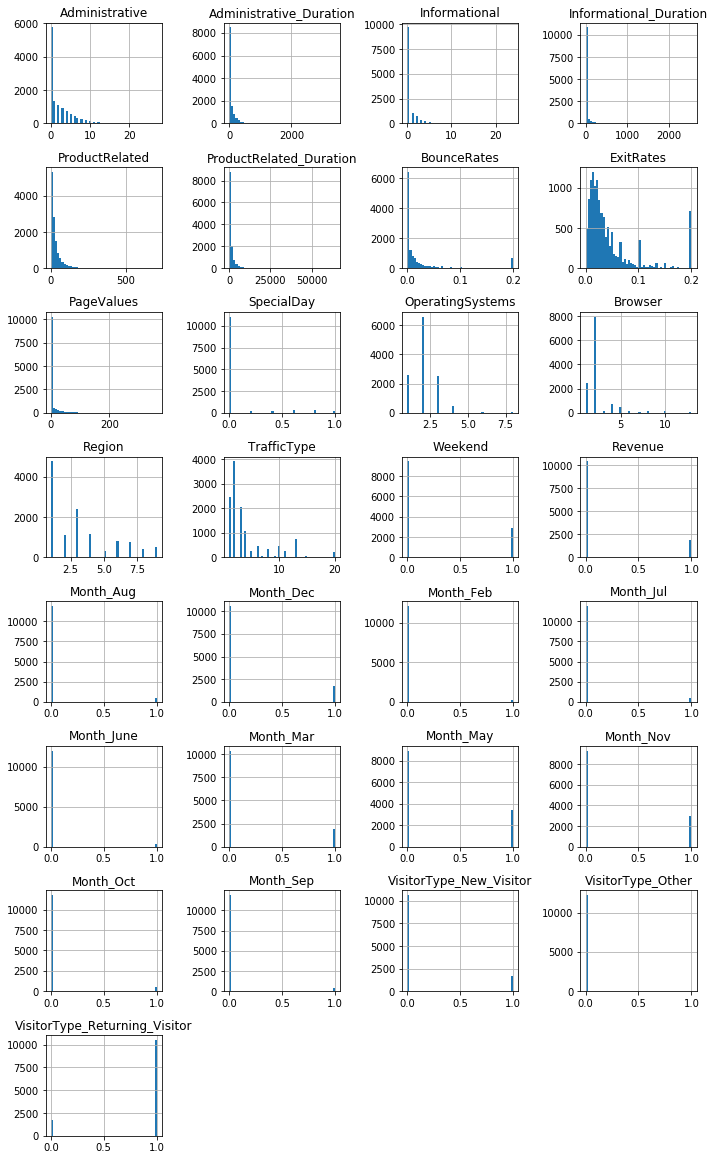

In [38]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(figsize=(10, 20),bins=50)
        ax.set_title(var_name)
    fig.tight_layout() 
    plt.show()
draw_histograms(df, df.columns,10 , 4)

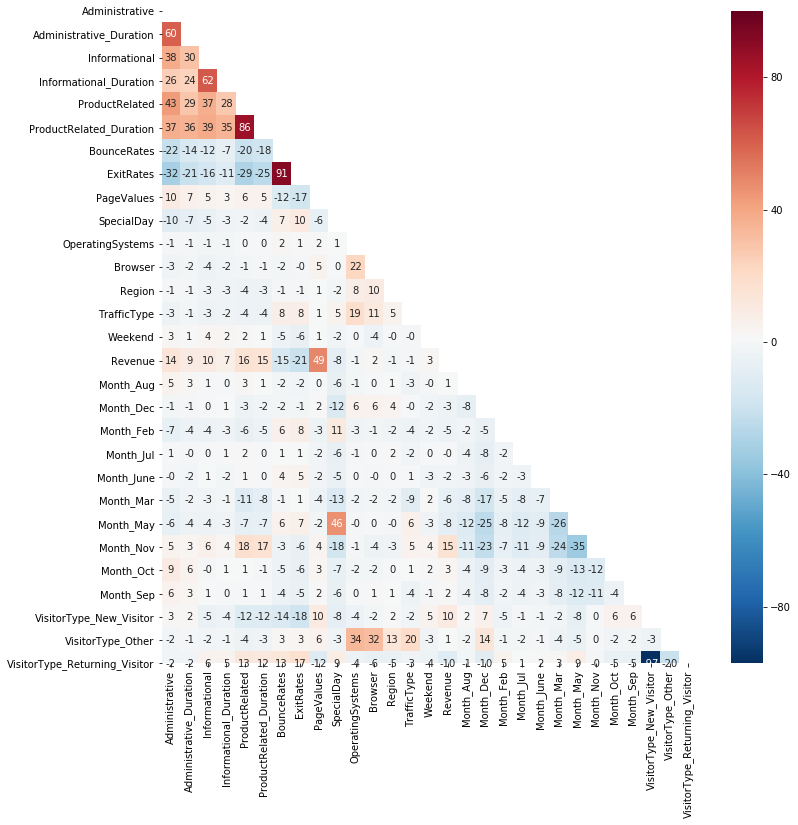

In [39]:
# Generate a mask for the upper triangle
z = np.zeros_like(df.corr(), dtype=np.bool)
z[np.triu_indices_from(z)] = True

plt.figure(figsize=(12,12))
sns.heatmap(df.corr()*100, mask=z, cmap="RdBu_r", annot=True, fmt='.0f')
plt.show()

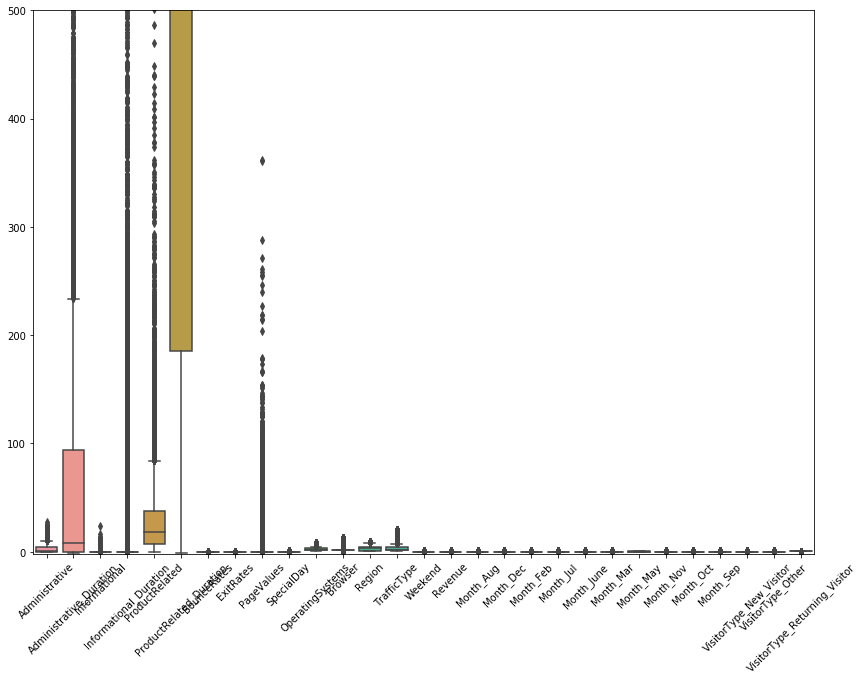

In [40]:
fig , ax1 = plt.subplots(figsize=(14,10))
ax1.set_xticklabels(labels= df.columns, rotation=45)
sns.boxplot(data=df)
plt.ylim(-2, 500)
plt.show()

# Implement SVM model
## 1. First trial with all the columns

In [60]:
# split dependent and independent variables
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize SVM instance
clf = LinearSVC(random_state=333)

# train the model
clf.fit(X_train, y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=333, tol=0.0001,
          verbose=0)

In [61]:
# use the trained model to predict
pred = clf.predict(X_test)

In [62]:
# calculate accuracy
print("accuracy score: ", (accuracy_score(y_test, pred)*100).round(2), "%")

accuracy score:  84.31 %


In [63]:
# check coefficient
print(X.columns)
print(clf.coef_)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')
[[ 5.52295248e-02 -2.55605451e-03  1.49493273e-02  1.97626468e-04
  -2.93045429e-02  7.92001741e-04 -7.79248131e-01 -9.07366602e-01
   3.30031621e-02 -4.47630488e-02 -1.15372135e-02 -4.62960132e-03
   6.73933601e-03  1.35669053e-02  1.58089837e-01 -4.98972264e-03
  -1.44581931e-01 -1.04249306e-01  4.90662473e-03  5.30846807e-02
  -4.41669554e-01 -3.64252835e-01  1.51130360e-02  5.17305188e-02
   3.58582045e-01 -1.12120653e-01 -2.46959730e-01 -2.1724

## 2. Second trial: drop columns with insignificant coefficiant

In [72]:
# split dependent and independent variables
X = df.drop(['Revenue', 'Administrative', 'Informational_Duration', 'ProductRelated_Duration', \
             'TrafficType'], axis=1)
y = df['Revenue']

# split train and test sets and stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize SVM instance
clf = LinearSVC(random_state=333)

# train the model
clf.fit(X_train, y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=333, tol=0.0001,
          verbose=0)

In [73]:
# use the trained model to predict
pred = clf.predict(X_test)

# calculate accuracy
print("accuracy score: ", (accuracy_score(y_test, pred)*100).round(2), "%")

accuracy score:  89.2 %


In [47]:
# check coefficient
print(X.columns)
print(clf.coef_)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'ProductRelated', 'BounceRates', 'ExitRates', 'PageValues',
       'SpecialDay', 'OperatingSystems', 'Browser', 'Weekend', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')
[[ 6.50878803e-03  1.30616451e-02  1.33528283e-02  1.39761371e-03
  -2.02773022e-01 -5.74435390e-01  4.39644815e-02  2.65501816e-02
  -4.99148166e-03  3.71443592e-04  4.94736976e-02  1.59223105e-02
  -1.15458615e-01 -2.41477799e-01 -1.23215004e-02 -8.90208877e-02
  -1.39865098e-01 -1.34530224e-01  1.03891771e-02  7.09626205e-03
   7.06563435e-02 -9.74127065e-02 -3.20074146e-01 -2.11123179e-01]]


## 3. Finetune the model with best hyperparameters

In [77]:
# set pipeline
pipeline = Pipeline(
                    [('svc', SVC(random_state=333)) #, max_iter=100005))
])

# get hypyparameters to be tuned
pipeline.get_params()

{'memory': None,
 'steps': [('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
       decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
       kernel='rbf', max_iter=-1, probability=False, random_state=333,
       shrinking=True, tol=0.001, verbose=False))],
 'verbose': False,
 'svc': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
     kernel='rbf', max_iter=-1, probability=False, random_state=333,
     shrinking=True, tol=0.001, verbose=False),
 'svc__C': 1.0,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'auto_deprecated',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': 333,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [ ]:
# set parameters
parameters = {}
parameters['svc__kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
parameters['svc__tol'] = [0.1, 1e-2, 1e-3, 1e-4]
parameters['svc__C'] = [0.00005, 0.0001, 0.0005, 0.001, 0.005]
parameters['svc__decision_function_shape'] = ['ovr', 'ovo']
parameters['svc__gamma'] = ['scale', 'auto']

# train model with the set hyperparameters
CV = GridSearchCV(pipeline, parameters, scoring = 'accuracy', cv=5)
CV.fit(X_train, y_train)   

# print the best hyperparameters
print('Best score and parameter combination = ')
print(CV.best_score_)    
print(CV.best_params_)

## Finalize model with the best hyper-parameters

In [50]:
# split dependent and independent variables
X = df.drop(['Revenue',  'Informational_Duration', 'ProductRelated_Duration', 'Region', \
             'TrafficType'], axis=1)
y = df['Revenue']

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize SVM instance with the best hyper-parameters
clf = LinearSVC(tol=0.01, C=0.0005, multi_class='crammer_singer', random_state=333, \
                dual=False, max_iter=100005)

# train the model
clf.fit(X_train, y_train)

# predict with the trained model
y_pred = CV.predict(X_test)
print("accuracy score: ", (accuracy_score(y_test, pred)*100).round(2), "%")

accuracy score:  69.5 %
